In [7]:
import os, pathlib, sys
from fnmatch import fnmatch
import re
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import json

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Scipy

In [6]:
similarity_matrix = pd.read_json("../../Visual-Analytics-Reddit-Mental-Health-Communties/data/UserOverlapData.json")
# Calculate dissimilarity matrix
dissimilarity_matrix = 1 - similarity_matrix

# Perform hierarchical clustering
Z = linkage(dissimilarity_matrix, method='average')

# Convert dendrogram to JSON
dendrogram_json = dendrogram(Z, no_plot=True)
json_data = json.dumps(dendrogram_json)

# Save JSON data to file
with open('../data/UserOverlapDendrogram.json', 'w') as f:
    f.write(json_data)

# Sklearn

C:\Users\taumuell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  """Fit without validation


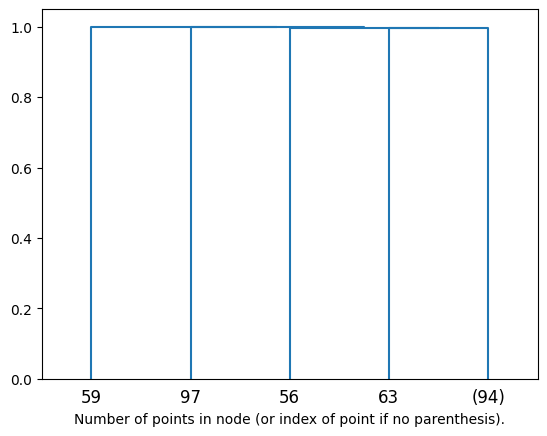

In [13]:
similarity_matrix = pd.read_json("../../Visual-Analytics-Reddit-Mental-Health-Communties/data/UserOverlapData.json")
# Calculate dissimilarity matrix
dissimilarity_matrix = 1 - similarity_matrix


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(affinity = "precomputed").fit(dissimilarity_matrix)

plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

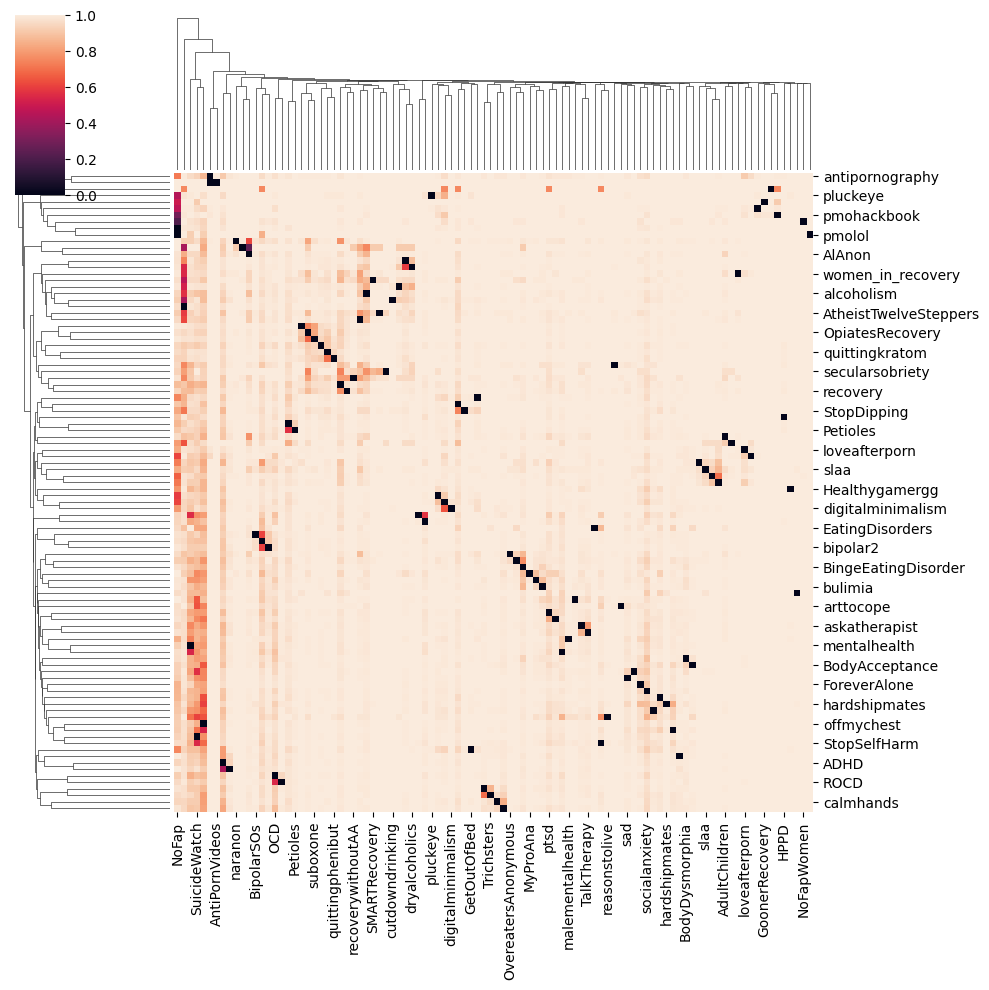

In [18]:
similarity_matrix = pd.read_json("../../Visual-Analytics-Reddit-Mental-Health-Communties/data/UserOverlapData.json")
# Calculate dissimilarity matrix
dissimilarity_matrix = 1 - similarity_matrix
sns.clustermap(dissimilarity_matrix)

In [15]:
# Step 1: Prepare your data (similarity matrix)
# Assuming `similarity_matrix` is your pandas DataFrame with similarity values
# and index/column names representing subreddits
similarity_matrix = pd.read_json("../../Visual-Analytics-Reddit-Mental-Health-Communties/data/UserOverlapData.json")

# Step 2: Convert DataFrame to numpy array
data_matrix = similarity_matrix.to_numpy()

# Step 3: Perform clustering
# Choose the number of clusters (n_clusters) based on your requirements
n_clusters = 3  # Adjust as needed
clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_assignments = clustering.fit_predict(data_matrix)

# Step 4: Add cluster assignments back to DataFrame
# Create a new DataFrame to store cluster assignments
clustered_df = similarity_matrix.copy()

# Add cluster assignments as a new column or index
clustered_df['Cluster'] = cluster_assignments  # Add as a new column
# OR
# clustered_df.index = cluster_assignments  # Add as index (row labels)

# Now `clustered_df` contains your original similarity matrix with cluster assignments
# You can use this DataFrame to create a heatmap in D3.js, retaining the index/column names.
clustered_df

,addiction,SMARTRecovery,AtheistTwelveSteppers,secularsobriety,recovery,sobrietyandrecovery,women_in_recovery,ScienceAndKindness,easyway,AdultChildren,...,rapecounseling,needadvice,getting_over_it,hardshipmates,MMFB,bulimia,BodyDysmorphia,BodyAcceptance,SelfHate,Cluster
addiction,1.000000,0.003035,0.001265,0.002023,0.034648,0.003035,0.003288,0.000000,0.0,0.004299,...,0.007587,0.013657,0.005311,0.000253,0.006323,0.008346,0.004805,0.002023,0.001517,0
SMARTRecovery,0.137931,1.000000,0.045977,0.045977,0.034483,0.000000,0.011494,0.011494,0.0,0.000000,...,0.000000,0.000000,0.011494,0.011494,0.000000,0.011494,0.000000,0.000000,0.000000,1
AtheistTwelveSteppers,0.058140,0.046512,1.000000,0.058140,0.034884,0.011628,0.023256,0.011628,0.0,0.011628,...,0.011628,0.000000,0.000000,0.000000,0.011628,0.011628,0.000000,0.000000,0.011628,1
secularsobriety,0.258065,0.129032,0.161290,1.000000,0.032258,0.000000,0.000000,0.000000,0.0,0.032258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
recovery,0.227953,0.004992,0.004992,0.001664,1.000000,0.011647,0.011647,0.000000,0.0,0.008319,...,0.011647,0.004992,0.004992,0.000000,0.004992,0.008319,0.004992,0.000000,0.003328,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMFB,0.008775,0.000000,0.000351,0.000000,0.001053,0.000000,0.000000,0.000000,0.0,0.002106,...,0.011232,0.073710,0.032643,0.008424,1.000000,0.003510,0.004212,0.012285,0.002106,0
bulimia,0.021654,0.000656,0.000656,0.000000,0.003281,0.001969,0.000656,0.000000,0.0,0.004593,...,0.010499,0.003937,0.005249,0.000656,0.006562,1.000000,0.028215,0.004593,0.002625,0
BodyDysmorphia,0.011256,0.000000,0.000000,0.000000,0.001777,0.000000,0.000000,0.000000,0.0,0.003555,...,0.007109,0.007701,0.002962,0.002370,0.007109,0.025474,1.000000,0.024289,0.007701,0
BodyAcceptance,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001603,...,0.020833,0.043269,0.017628,0.001603,0.056090,0.011218,0.065705,1.000000,0.000000,0
